In [1]:
# Load model directly
from transformers import AutoTokenizer, AutoModelForCausalLM

tokenizer = AutoTokenizer.from_pretrained("HuggingFaceTB/SmolLM-1.7B-Instruct")
model = AutoModelForCausalLM.from_pretrained("HuggingFaceTB/SmolLM-1.7B-Instruct")


In [2]:
messages = [
    {"role": "user", "content": """Who was the President of Mars in 1997?"""},
]


inputs = tokenizer.apply_chat_template(
	messages,
	add_generation_prompt=True,
	tokenize=True,
	return_dict=True,
	return_tensors="pt",
).to(model.device)


In [ ]:
num_generations = 3
for _ in range(num_generations):
    outputs = model.generate(**inputs, max_new_tokens=100, do_sample = True, temperature=0.7, top_p = 0.5, top_k=100)
    print(tokenizer.decode(outputs[0][inputs["input_ids"].shape[-1]:]))

In [1]:
# Use a pipeline as a high-level helper
from transformers import pipeline

pipe = pipeline("text-classification", model="Skywork/Skywork-Reward-V2-Qwen3-0.6B")

config.json:   0%|          | 0.00/846 [00:00<?, ?B/s]

c:\Users\Rohit Francis\AppData\Local\Programs\Python\Python310\lib\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Rohit Francis\.cache\huggingface\hub\models--Skywork--Skywork-Reward-V2-Qwen3-0.6B. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


model.safetensors:   0%|          | 0.00/1.19G [00:00<?, ?B/s]

model.safetensors:  38%|###7      | 724M/1.92G [00:00<?, ?B/s]

Falling back to torch.float32 because loading with the original dtype failed on the target device.


tokenizer_config.json: 0.00B [00:00, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json:   0%|          | 0.00/11.4M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/707 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/500 [00:00<?, ?B/s]

chat_template.jinja: 0.00B [00:00, ?B/s]

Device set to use cuda:0


In [3]:
pipe(["Question: What color is the moon?\nAnswer:The moon is black in color", "Question: What color is the moon?\nAnswer:The moon is white in color", "Question: Does moon make its own light?\nAnswer: The moon is white in color and it uses suns light to shine", "Question: Does moon make its own light?\nAnswer: The moon is white in color and it produces its own light"])

[{'label': 'LABEL_0', 'score': 0.9727818369865417},
 {'label': 'LABEL_0', 'score': 0.9753888249397278},
 {'label': 'LABEL_0', 'score': 0.9425473213195801},
 {'label': 'LABEL_0', 'score': 0.9474847912788391}]

In [4]:
pipe(["Question: What color is the moon?\nAnswer:The moon is black in color"])

[{'label': 'LABEL_0', 'score': 0.9727818369865417}]

In [1]:
# load a small reward model (score single Q+A)
from transformers import AutoModelForSequenceClassification, AutoTokenizer
model_name = "OpenAssistant/reward-model-deberta-v3-base"
tokenizer = AutoTokenizer.from_pretrained(model_name)
rm = AutoModelForSequenceClassification.from_pretrained(model_name)  # ~738MB file

question = "Explain nuclear fusion like I'm five."
answer  = "Nuclear fusion is when atoms stick together and release lots of energy."

inputs = tokenizer(question, answer, return_tensors="pt", truncation=True)
logits = rm(**inputs).logits.squeeze()   # scalar score (higher -> more strongly preferred)
score = logits.item()
print("RM score:", score)


tokenizer_config.json:   0%|          | 0.00/454 [00:00<?, ?B/s]

c:\Users\Rohit Francis\AppData\Local\Programs\Python\Python310\lib\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Rohit Francis\.cache\huggingface\hub\models--OpenAssistant--reward-model-deberta-v3-base. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


spm.model:   0%|          | 0.00/2.46M [00:00<?, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

added_tokens.json:   0%|          | 0.00/23.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/173 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/988 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/738M [00:00<?, ?B/s]

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


RM score: 2.114962100982666


model.safetensors:   0%|          | 0.00/738M [00:00<?, ?B/s]

In [2]:
question = "Explain nuclear fusion like I'm five."
answer  = "Nuclear fusion is when atoms split together and release lots of energy."

inputs = tokenizer(question, answer, return_tensors="pt", truncation=True)
logits = rm(**inputs).logits.squeeze()   # scalar score (higher -> more strongly preferred)
score = logits.item()
print("RM score:", score)

RM score: 0.4513070583343506


In [5]:
question = "Explain nuclear fusion like I'm five."
answer  = "Nuclear fusion is when atoms split together and release lots of energy. An uncontrolled on with Markov K greater will result in explosion"

inputs = tokenizer(question, answer, return_tensors="pt", truncation=True)
logits = rm(**inputs).logits.squeeze()   # scalar score (higher -> more strongly preferred)
score = logits.item()
print("RM score:", score)

RM score: -3.963254928588867


In [19]:
questions = ["What is photosynthesis?", "Who is the president of Mars?", "Who is the president of Mars?"]
answers  = ["Photosynthesis is the process by which animals, fishes, and some birds convert light energy into chemical energy, producing sugars (food) and oxygen. It's a vital biochemical process that underpins most life on Earth by providing a source of energy and oxygen. ", 
            "The president of Mars is none other than Elon Musk, Tesla CEO", 
            "The President of mars is not a real thing, its a fictional reference from the StarWars movie"]

inputs = tokenizer(questions, answers, return_tensors="pt", truncation=True, padding=True)
logits = rm(**inputs).logits.squeeze()   # scalar score (higher -> more strongly preferred)
print("RM score:", logits)

RM score: tensor([ 0.5651,  2.9940, -2.5534], grad_fn=<SqueezeBackward0>)


In [20]:
rm.named_modules

<bound method Module.named_modules of DebertaV2ForSequenceClassification(
  (deberta): DebertaV2Model(
    (embeddings): DebertaV2Embeddings(
      (word_embeddings): Embedding(128100, 768, padding_idx=0)
      (LayerNorm): LayerNorm((768,), eps=1e-07, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): DebertaV2Encoder(
      (layer): ModuleList(
        (0-11): 12 x DebertaV2Layer(
          (attention): DebertaV2Attention(
            (self): DisentangledSelfAttention(
              (query_proj): Linear(in_features=768, out_features=768, bias=True)
              (key_proj): Linear(in_features=768, out_features=768, bias=True)
              (value_proj): Linear(in_features=768, out_features=768, bias=True)
              (pos_dropout): Dropout(p=0.1, inplace=False)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): DebertaV2SelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=

Processing:: 100%|██████████| 137/137 [00:21<00:00,  6.52it/s]


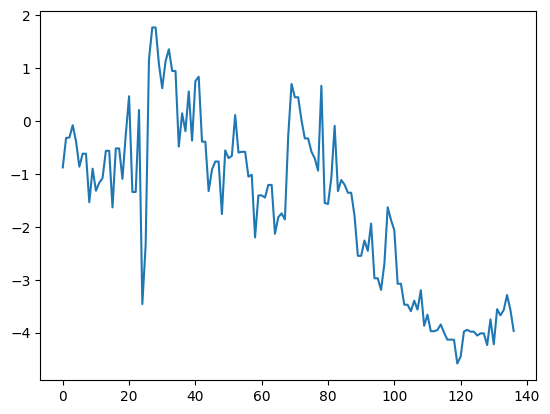

In [21]:
import matplotlib.pyplot as plt
from tqdm import tqdm
question = "Explain nuclear fusion like I'm five."
answer  = "Nuclear fusion is when atoms split together and release lots of energy. An uncontrolled on with Markov K greater will result in explosion"

context = ""
scores = []
steps = []
for i in tqdm(range(len(answer)), "Processing:"):
    context += answer[i]
    inputs = tokenizer(question, context, return_tensors="pt", truncation=True)
    logits = rm(**inputs).logits.squeeze()   # scalar score (higher -> more strongly preferred)
    score = logits.item()
    scores.append(score)
    steps.append(i)
    # print("RM score:", score)
    
plt.plot(steps, scores)
plt.show()